In [ ]:
# World bank data contains information on 217 world economies for over half a century from 1960 to 2015
# Data consists of many indicators such as Population, electricity consumption, CO2 emissions, literacy rates, mortality rate etc




In [2]:
# Sometimes, data sources can be so large in size that storing the entire dataset in memory becomes too resource-intensive. 
# In this exercise, you will process the first 1000 rows of a file line by line.


# Task 1 - the aim is to create a dictionary of the counts of how many times each country appears in a column in the dataset.

# To begin, you need to open a connection to this file using what is known as a context manager.
# For example, the command with open('datacamp.csv') as datacamp binds the csv file 'datacamp.csv' as datacamp in the context manager. 
# Here, the with statement is the context manager, and its purpose is to ensure that resources are efficiently allocated when opening a connection to a file.


# Open a connection to the file
with open('D:\Data Camp\big_data.csv') as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

OSError: [Errno 22] Invalid argument: 'D:\\Data Camp\x08ig_data.csv'

In [ ]:
# Task 2 - Using python generaotrs to load data in chunks (1)

# In the previous exercise, you processed a file line by line for a given number of lines. 
#What if, however, you want to do this for the entire file?
# Generators allow users to lazily evaluate data

#In this exercise, you will define a generator function read_large_file() that produces a generator object.
# this generator object yields a single line from a file each time next() is called on it.
# when you open a connection to a file, the resulting file object is already a generator! 
# So out in the wild, you won't have to explicitly create generator objects in cases such as this

def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data
        
# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))
    

In [ ]:
# Task 3 -  Using python generaotrs to load data in chunks (2) : using above read_large_file() function to process big data of world bank 

# Using generator function to process the World Bank dataset like you did previously.
# process the file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset. 
# For this exercise, however, you won't process just 1000 rows of data, you'll process the entire dataset!

# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)

In [ ]:
# Task 4 - PANDAS read_csv iterator for streaming data - (1)

#Another way to read data too large to store in memory in chunks is to read the file in as DataFrames of a certain length, say, 100. 
# For example, with the pandas package (imported as pd), you can do pd.read_csv(filename, chunksize=100). 
# This creates an iterable reader object, which means that you can use next() on it.

# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('ind_pop.csv', chunksize = 10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))


In [ ]:
# Task 5 - PANDAS read_csv iterator for streaming data - (2)

# In the previous task, you used read_csv() to read in DataFrame chunks from a large dataset. 
#In this exercise, you will read in a file using a bigger DataFrame chunk size and then process the data from the first chunk. 
#To process the data, you will create another DataFrame composed of only the rows from a specific country.
# You will then zip together two of the columns from the new DataFrame, 'Total Population' and 'Urban population (% of total)'. 
# Finally, you will create a list of tuples from the zip object, where each tuple is composed of a value from each of the two columns mentioned.

# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('ind_pop_data.csv', chunksize = 1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb 
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB'] #<-- Select only the rows of df_urb_pop that have a 'CountryCode' of 'CEB'

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

C:\Users\shobh\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


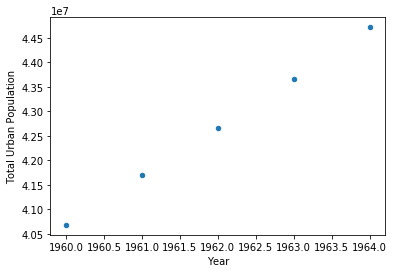

In [7]:
# Task 6 - Writing an iterator to load data in chunks (3)

# building on above tasks, you will be using a list comprehension to create the values for a new column 'Total Urban Population'
 #..from the list of tuples that you generated earlier. 
# Recall from the previous exercise that the first and second elements of each tuple consist of, respectively, 
 # ..values from the columns 'Total Population' and 'Urban population (% of total)'. 
# The values in this new column 'Total Urban Population', therefore, are the product of the first and second element in each 
 #.. tuple. Furthermore, because the 2nd element is a percentage, you need to divide the entire result by 100, or alternatively, 
 #.. multiply it by 0.01

import pandas as pd
import matplotlib.pyplot as plt

# Code from previous exercise
urb_pop_reader = pd.read_csv("D:\Data Camp\world_ind_pop_data.csv", chunksize=1000)
df_urb_pop = next(urb_pop_reader)
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], 
           df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(element[0]*(element[1]/100)) for element in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind= 'scatter', x='Year', y='Total Urban Population')
plt.show()

C:\Users\shobh\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


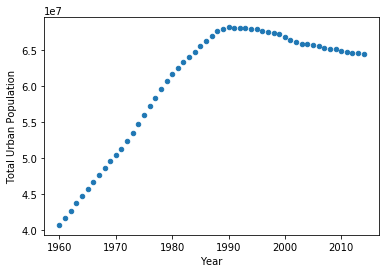

In [8]:
# Task 7 -   Writing an iterator to load data in chunks (4)

#In the previous exercises, you've only processed the data from the first DataFrame chunk.
#This time, you will aggregate the results over all the DataFrame chunks in the dataset. 
#This basically means you will be processing the entire dataset now.

import pandas as pd
import matplotlib.pyplot as plt

# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv("D:\Data Camp\world_ind_pop_data.csv", chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

C:\Users\shobh\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


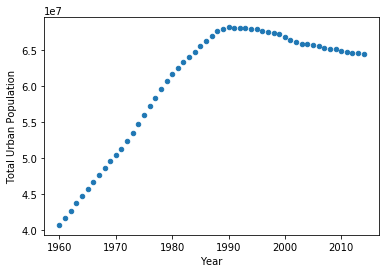

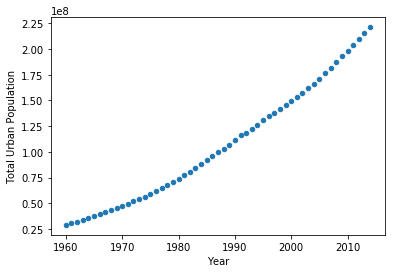

In [9]:
# FINAL TASK - Writing an iterator to load data in chunks (5)

#In this last exercise, you will put all the code for processing the data into a single function 
# ..so that you can reuse the code without having to rewrite the same things all over again.

#You're going to define the function plot_pop() which takes two arguments: the filename of the file to be processed, 
#..and the country code of the rows you want to process in the dataset.

# Because all of the previous code you've written in the previous exercises will be housed in plot_pop(), calling the function already does the following:
    #Loading of the file chunk by chunk,
    #Creating the new column of urban population values, and
    #Plotting the urban population data.
    
    # Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop("D:\Data Camp\world_ind_pop_data.csv", 'CEB')

# Call plot_pop for country code 'ARB'
plot_pop("D:\Data Camp\world_ind_pop_data.csv", 'ARB')
